In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named "data.csv"
data = pd.read_csv(r'C:\Users\JFB\Documents\Pythoncsv\OrganicInstallTestData.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

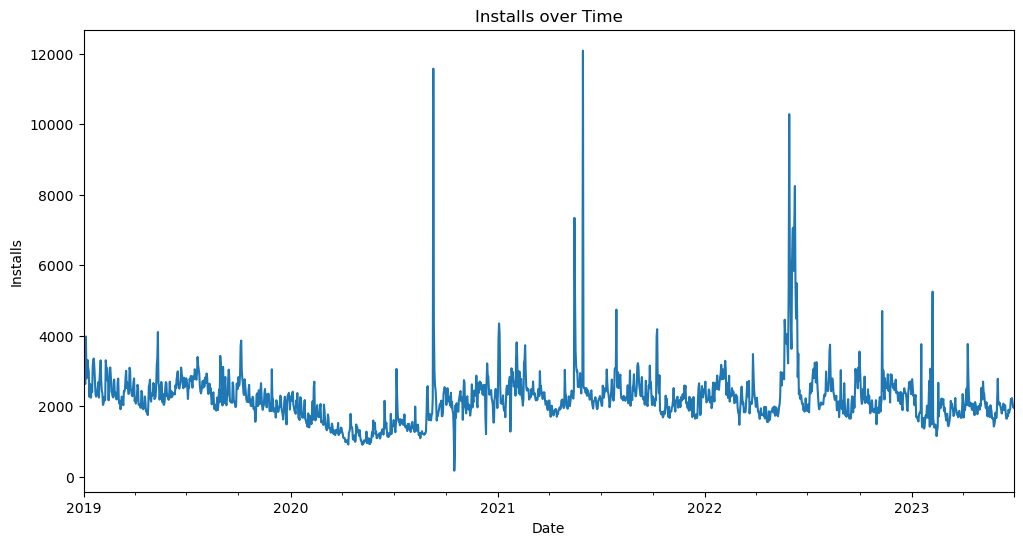

In [2]:
# Plot the data
data['installs'].plot(figsize=(12, 6))
plt.title('Installs over Time')
plt.ylabel('Installs')
plt.show()

In [3]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['installs'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# if p-value < 0.05, data is stationary

ADF Statistic: -5.988384929498351
p-value: 1.7696141110920984e-07


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=2.82 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=25782.167, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=25604.151, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=25441.758, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=25780.171, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=25440.026, Time=0.27 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=25440.719, Time=0.43 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=25371.560, Time=0.58 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=25370.448, Time=1.25 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=25368.717, Time=2.30 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=25373.571, Time=1.36 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=25429.816, Time=1.42 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   :

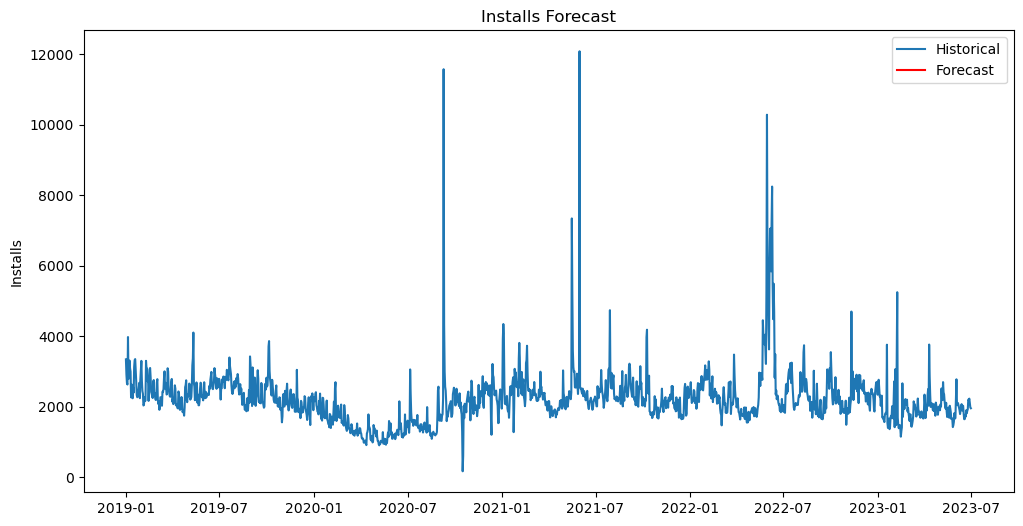

In [6]:
from pmdarima import auto_arima

model = auto_arima(data['installs'], seasonal=True, m=7, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(data['installs'])

forecast = model.predict(n_periods=182)
forecast_series = pd.Series(forecast, index=pd.date_range(start='2023-01-01', periods=182, freq='D'))

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['installs'], label='Historical')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
plt.title('Installs Forecast')
plt.ylabel('Installs')
plt.legend()
plt.show()

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the best model
model = SARIMAX(data['installs'], order=(1, 1, 3), seasonal_order=(2, 0, 0, 7))
results = model.fit(disp=-1)

# Forecast for the next 182 days
forecast = results.get_forecast(steps=182).predicted_mean

# Create a new series for forecast values
forecast_series = pd.Series(forecast, index=pd.date_range(start='2023-01-01', periods=182, freq='D'))


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [8]:
# Aggregate the forecast by month
monthly_forecast = forecast_series.resample('M').sum()

# Print the aggregated values
print(monthly_forecast)

2023-01-31       0.000000
2023-02-28       0.000000
2023-03-31       0.000000
2023-04-30       0.000000
2023-05-31       0.000000
2023-06-30       0.000000
2023-07-31    1992.628798
Freq: M, Name: predicted_mean, dtype: float64
